In [2]:
import os, itertools
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from joblib import Parallel, delayed
from IPython import embed as shell

from tools_mcginley import utils
import analyses_tools

from accumodels import hddm_tools

/opt/conda/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
project_dir = '/home/jovyan/hddm'
# exp_names = ['yesno_audio', 'bias_manipulation_30', 'bias_manipulation_70', 'image_recognition', 'bias_manipulation',]
# bin_measures = ['pupil_resp_1s', 'pupil_resp_1s', 'pupil_resp_1s', 'pupil_resp_1s', 'pupil_resp_1s']
# nrs_bins = [5,3,3,2,3]
exp_names = ['gonogo_audio_mouse', 'gonogo_audio_human', 'yesno_audio', 'bias_manipulation_30', 'bias_manipulation_70', 'image_recognition']
bin_measures = ['pupil_stim_1s', 'pupil_stim_1s', 'pupil_resp_1s', 'pupil_resp_1s', 'pupil_resp_1s', 'pupil_resp_1s']
nrs_bins = [5,5,5,3,3,2]


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


gonogo_audio_mouse(10) --> -28.88 (2.67)
gonogo_audio_human(10) --> -29.47 (0.43)


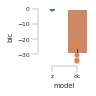

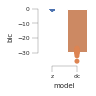

In [4]:
# go-nogo:
for exp_name in ['gonogo_audio_mouse', 'gonogo_audio_human']:
    
    bics = []
    for version in [9,10]:
        bic = pd.read_csv(os.path.join(project_dir, 'fits', '{}_{}.csv'.format(exp_name, version)))
        bic['model'] = version
        bic['subj_idx'] = np.arange(bic.shape[0])
        bics.append(bic[['bic', 'model', 'subj_idx']])
    bics = pd.concat(bics)

    # subtract bics:
    subtract = np.array(bics.loc[bics['model']==bics['model'].min(), 'bic'])
    for m in bics['model'].unique():
        bics.loc[bics['model']==m, 'bic'] = np.array(bics.loc[bics['model']==m, 'bic']) - subtract
    for version in [10]:
        print('{}({}) --> {} ({})'.format(exp_name, version, round(bics.loc[bics['model']==version, 'bic'].mean(),2), round(bics.loc[bics['model']==version, 'bic'].sem(),2)))    

        fig = plt.figure(figsize=(1.5,1.5))
        sns.barplot(x='model', y='bic', units='subj_idx', ci=66, errwidth=1, data=bics)
        sns.stripplot(x='model', y='bic', jitter=False, data=bics)
        plt.xticks([0,1], ['z', 'dc'])
        sns.despine(offset=2, trim=True)
        plt.tight_layout()
        fig.savefig(os.path.join(project_dir, 'figs', 'ddm', 'comparisons_{}_{}.pdf'.format(exp_name, version)))



In [5]:
# yes/no bICs:
for exp_name in ['yesno_audio', 'bias_manipulation_30', 'bias_manipulation_70', 'image_recognition']:
    
    bics = []
    for version in [1,2,3]:
        bic = pd.read_csv(os.path.join(project_dir, 'fits', '{}_{}.csv'.format(exp_name, version)))
        bic['model'] = version
        bic['subj_idx'] = np.arange(bic.shape[0])
        bics.append(bic[['bic', 'model', 'subj_idx']])
    bics = pd.concat(bics)

    # subtract bics:
    subtract = np.array(bics.loc[bics['model']==bics['model'].min(), 'bic'])
    for m in bics['model'].unique():
        bics.loc[bics['model']==m, 'bic'] = np.array(bics.loc[bics['model']==m, 'bic']) - subtract
    for version in [1,2]:
        print('{}({}) --> {} ({})'.format(exp_name, version, round(bics.loc[bics['model']==version, 'bic'].mean(),2), round(bics.loc[bics['model']==version, 'bic'].sem(),2)))


    fig = plt.figure(figsize=(1.5,1.5))
    sns.barplot(x='model', y='bic', units='subj_idx', ci=66, errwidth=1, data=bics)
    sns.stripplot(x='model', y='bic', jitter=False, data=bics)
    plt.xticks([0,1,2], ['z', 'dc', 'u'])
    sns.despine(offset=2, trim=True)
    plt.tight_layout()
    fig.savefig(os.path.join(project_dir, 'figs', 'ddm', 'comparisons_{}_{}.pdf'.format(exp_name, version)))



    bics = []
    for version in [5,6,7]:
        bic = pd.read_csv(os.path.join(project_dir, 'fits', '{}_{}.csv'.format(exp_name, version)))
        bic['model'] = version
        bic['subj_idx'] = np.arange(bic.shape[0])
        bics.append(bic[['bic', 'model', 'subj_idx']])
    bics = pd.concat(bics)

    # subtract bics:
    subtract = np.array(bics.loc[bics['model']==bics['model'].min(), 'bic'])
    for m in bics['model'].unique():
        bics.loc[bics['model']==m, 'bic'] = np.array(bics.loc[bics['model']==m, 'bic']) - subtract
    for version in [5,6]:
        print('{}({}) --> {} ({})'.format(exp_name, version, round(bics.loc[bics['model']==version, 'bic'].mean(),2), round(bics.loc[bics['model']==version, 'bic'].sem(),2)))

    fig = plt.figure(figsize=(1.5,1.5))
    sns.barplot(x='model', y='bic', units='subj_idx', ci=66, errwidth=1, data=bics)
    sns.stripplot(x='model', y='bic', jitter=False, data=bics)
    plt.xticks([0,1,2], ['z', 'dc', 'u'])
    sns.despine(offset=2, trim=True)
    plt.tight_layout()
    fig.savefig(os.path.join(project_dir, 'figs', 'ddm', 'comparisons_{}_{}.pdf'.format(exp_name, version)))


FileNotFoundError: [Errno 2] File /home/jovyan/hddm/fits/yesno_audio_2.csv does not exist: '/home/jovyan/hddm/fits/yesno_audio_2.csv'

yesno_audio(11) -->          dic  model
0   0.000000      9
1 -56.392388     10
2 -49.363762     11
bias_manipulation_30(11) -->          dic  model
0   0.000000      9
1 -44.334748     10
2 -31.770743     11
bias_manipulation_70(11) -->          dic  model
0   0.000000      9
1 -15.016711     10
2  -0.637531     11
image_recognition(11) -->          dic  model
0   0.000000      9
1 -82.683594     10
2 -51.369382     11


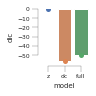

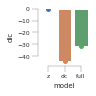

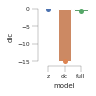

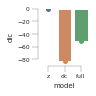

In [4]:
# yes/no DICs:
for exp_name in ['yesno_audio', 'bias_manipulation_30', 'bias_manipulation_70', 'image_recognition']:
    dics = []
    for version in [9,10,11]:
        m = hddm_tools.load_ddm_per_group(os.path.join(project_dir, 'fits'), '{}_{}'.format(exp_name, version), n_models=1)[0]
        dics.append(m.dic)
    dics = pd.DataFrame(dics)
    dics['model'] = np.array([9,10,11])
    dics.columns = ['dic', 'model']
    dics['dic'] = dics['dic'] - dics['dic'].iloc[0]

    fig = plt.figure(figsize=(1.5,1.5))
    sns.barplot(x='model', y='dic', ci=66, errwidth=1, data=dics)
    sns.stripplot(x='model', y='dic', jitter=False, data=dics)
    plt.xticks([0,1,2], ['z', 'dc', 'full'])
    sns.despine(offset=2, trim=True)
    plt.tight_layout()
    fig.savefig(os.path.join(project_dir, 'figs', 'ddm', 'comparisons_{}_{}.pdf'.format(exp_name, version)))





    print('{}({}) --> {}'.format(exp_name, version, dics))


    